In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
customer_info=pd.read_excel("/content/drive/MyDrive/customers (UK).xlsx","customer info")
item=pd.read_excel("/content/drive/MyDrive/customers (UK).xlsx","Items")
transaction=pd.read_excel("/content/drive/MyDrive/customers (UK).xlsx","Customer transactions")

In [ ]:
customer_info.head(5)

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N


In [ ]:
item.head(5)

,ItemID,Product,Brand,SellPrice,CostPrice
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392


In [ ]:
transaction.head(5)

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0,0,352,2020-03-21,In Store
1,0,0,3433,2020-07-14,In Store
2,0,0,11162,2020-08-09,In Store
3,0,0,13011,2020-12-07,In Store
4,0,0,13885,2020-11-08,In Store


In [ ]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          770 non-null    int64         
 1   FirstName   770 non-null    object        
 2   LastName    770 non-null    object        
 3   Country     770 non-null    object        
 4   DateJoined  770 non-null    datetime64[ns]
 5   Gender      519 non-null    object        
 6   Birthday    770 non-null    datetime64[ns]
 7   Newsletter  770 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 48.2+ KB


#CREATE 4 COLUMNS NAMED TENURE, RECENCY,	FREQUENCY, MONETARY


In [ ]:
from datetime import datetime as dt
import numpy as np

In [ ]:
customer_info['Age']=dt.now().year-customer_info.Birthday.dt.year

In [ ]:
customer_info['Tenure']=(dt.now()-customer_info.DateJoined)

In [ ]:
customer_info

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Age,Tenure
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,55,2876 days 02:07:26.520160
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y,14,2873 days 02:07:26.520160
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y,33,2872 days 02:07:26.520160
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N,49,2872 days 02:07:26.520160
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N,42,2872 days 02:07:26.520160
...,...,...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N,34,2614 days 02:07:26.520160
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,NaN,1965-07-25,Y,58,2614 days 02:07:26.520160
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y,43,2614 days 02:07:26.520160
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y,43,2614 days 02:07:26.520160


In [ ]:
pvt_txt=transaction.pivot_table(index='CustomerID',values='TransactionDate',aggfunc='max')

In [ ]:
pvt_txt.reset_index(inplace=True)

In [ ]:
pvt_txt

,CustomerID,TransactionDate
0,0,2020-12-23
1,1,2020-12-15
2,2,2020-12-11
3,3,2020-12-20
4,4,2020-12-22
...,...,...
765,765,2020-12-05
766,766,2020-07-07
767,767,2020-12-26
768,768,2020-12-27


In [ ]:
pvt_txt['Recency']=dt.now()-pvt_txt.TransactionDate

In [ ]:
customer_RFM=customer_info.merge(pvt_txt,how='inner',right_on='CustomerID',left_on='ID')

In [ ]:
pvt_txt=transaction.pivot_table(index='CustomerID',values='OrderID',aggfunc=lambda x:len(x.unique()))

In [ ]:
pvt_txt.reset_index(inplace=True)

In [ ]:
pvt_txt['Frequency']=pvt_txt['OrderID']

In [ ]:
pvt_txt.drop('OrderID',axis=1,inplace=True)

In [ ]:
customer_RFM=customer_RFM.merge(pvt_txt,how='inner',left_on='ID',right_on='CustomerID')

In [ ]:
customer_RFM

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Age,Tenure,CustomerID_x,TransactionDate,Recency,CustomerID_y,Frequency
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,55,2876 days 02:07:26.520160,0,2020-12-23,1044 days 02:07:26.615697,0,15
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y,14,2873 days 02:07:26.520160,1,2020-12-15,1052 days 02:07:26.615697,1,14
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y,33,2872 days 02:07:26.520160,2,2020-12-11,1056 days 02:07:26.615697,2,7
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N,49,2872 days 02:07:26.520160,3,2020-12-20,1047 days 02:07:26.615697,3,6
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N,42,2872 days 02:07:26.520160,4,2020-12-22,1045 days 02:07:26.615697,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N,34,2614 days 02:07:26.520160,765,2020-12-05,1062 days 02:07:26.615697,765,13
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,NaN,1965-07-25,Y,58,2614 days 02:07:26.520160,766,2020-07-07,1213 days 02:07:26.615697,766,2
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y,43,2614 days 02:07:26.520160,767,2020-12-26,1041 days 02:07:26.615697,767,19
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y,43,2614 days 02:07:26.520160,768,2020-12-27,1040 days 02:07:26.615697,768,15


In [ ]:
value_order=transaction.merge(item[['ItemID','SellPrice']],how='inner')

In [ ]:
value_order_pvt=value_order.pivot_table(index='CustomerID',values='SellPrice',aggfunc='sum')

In [ ]:
value_order_pvt.reset_index(inplace=True)

In [ ]:
value_order_pvt

,CustomerID,SellPrice
0,0,32997
1,1,34948
2,2,17879
3,3,14603
4,4,37029
...,...,...
765,765,29538
766,766,5331
767,767,45470
768,768,35462


In [ ]:
value_order_pvt['Monetary']=value_order_pvt['SellPrice']

In [ ]:
value_order_pvt.drop('SellPrice',axis=1,inplace=True)

In [ ]:
customer_RFM=customer_RFM[['ID','Country','Gender','Newsletter','Age','Tenure','Recency','Frequency']].merge(value_order_pvt,how='inner',left_on='ID',right_on='CustomerID')

In [ ]:
customer_RFM.drop('CustomerID',axis=1,inplace=True)

#PREPROCESSING


###CHECK NULL, DUPLICATED


In [ ]:
customer_RFM.isnull().sum()

ID              0
Country         0
Gender        251
Newsletter      0
Age             0
Tenure          0
Recency         0
Frequency       0
Monetary        0
dtype: int64

In [ ]:
customer_RFM.dropna(subset='Gender',inplace=True)

In [ ]:
customer_RFM.duplicated().sum()

0

In [ ]:
customer_RFM.reset_index(inplace=True,drop=True)

In [ ]:
customer_RFM

,ID,Country,Gender,Newsletter,Age,Tenure,Recency,Frequency,Monetary
0,1,GER - Germany,M,Y,14,2873 days 02:07:26.520160,1052 days 02:07:26.615697,14,34948
1,2,FR - France,F,Y,33,2872 days 02:07:26.520160,1056 days 02:07:26.615697,7,17879
2,3,UK - United Kingdom,M,N,49,2872 days 02:07:26.520160,1047 days 02:07:26.615697,6,14603
3,4,IT - Italy,M,N,42,2872 days 02:07:26.520160,1045 days 02:07:26.615697,14,37029
4,5,GER - Germany,F,Y,44,2871 days 02:07:26.520160,1045 days 02:07:26.615697,18,36913
...,...,...,...,...,...,...,...,...,...
514,764,UK - United Kingdom,M,Y,28,3083 days 02:07:26.520160,1047 days 02:07:26.615697,2,5205
515,765,GER - Germany,F,N,34,2614 days 02:07:26.520160,1062 days 02:07:26.615697,13,29538
516,767,GER - Germany,M,Y,43,2614 days 02:07:26.520160,1041 days 02:07:26.615697,19,45470
517,768,GER - Germany,M,Y,43,2614 days 02:07:26.520160,1040 days 02:07:26.615697,15,35462


In [ ]:


customer_RFM_1=customer_RFM

### ENCODING


In [ ]:
customer_RFM_1[['Tenure','Recency']]=customer_RFM[['Tenure','Recency']].astype('timedelta64[D]')
customer_RFM_1['Gender'].replace(['M','F'],[1,0],inplace=True)
customer_RFM_1['Newsletter'].replace(['Y','N'],[1,0],inplace=True)

In [ ]:
customer_RFM_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          519 non-null    int64  
 1   Country     519 non-null    object 
 2   Gender      519 non-null    int64  
 3   Newsletter  519 non-null    int64  
 4   Age         519 non-null    int64  
 5   Tenure      519 non-null    float64
 6   Recency     519 non-null    float64
 7   Frequency   519 non-null    int64  
 8   Monetary    519 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 36.6+ KB


In [ ]:
customer_RFM_1=pd.get_dummies(customer_RFM_1)

#CLUSTERING


In [ ]:
X=customer_RFM_1.iloc[:,1:]

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(7,3),'figure.dpi':120})

In [ ]:
si=[]
for k in range(2,20):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(X)
  label=kmeans.predict(X)
  score=silhouette_score(X,label)
  si.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

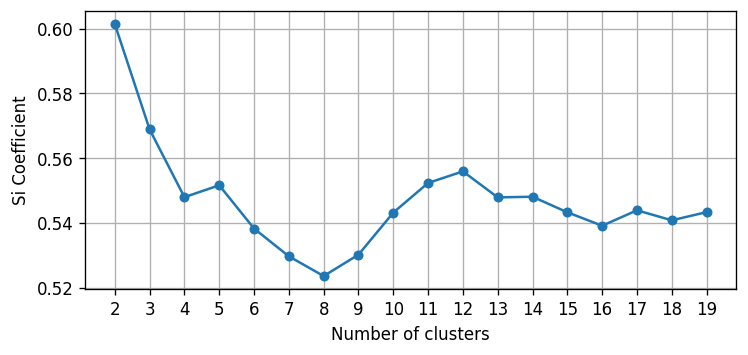

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(range(2,20),si,'.-',markersize=10)
plt.xticks(range(2,20))
plt.xlabel('Number of clusters')
plt.ylabel('Si Coefficient')
plt.grid(linestyle='-')
plt.show()

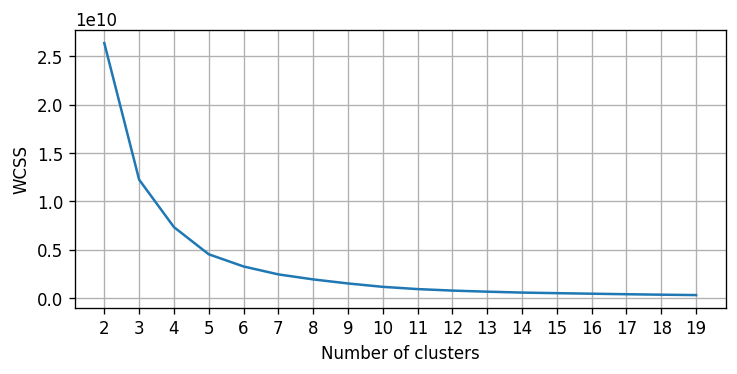

In [ ]:
wcss=[]
for k in range(2,20):
  kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=150,n_init=100)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(2,20),wcss,'-')
plt.xticks(range(2,20))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(linestyle='-')


In [ ]:
kmeans=KMeans(n_clusters=5)
y_pred=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
customer_RFM['Class']=y_pred

In [ ]:
customer_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          519 non-null    int64  
 1   Country     519 non-null    object 
 2   Gender      519 non-null    int64  
 3   Newsletter  519 non-null    int64  
 4   Age         519 non-null    int64  
 5   Tenure      519 non-null    float64
 6   Recency     519 non-null    float64
 7   Frequency   519 non-null    int64  
 8   Monetary    519 non-null    int64  
 9   Class       519 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 38.6+ KB


In [ ]:
palette=['red','green','blue','yellow','grey']

#DATA VISUALIZATION

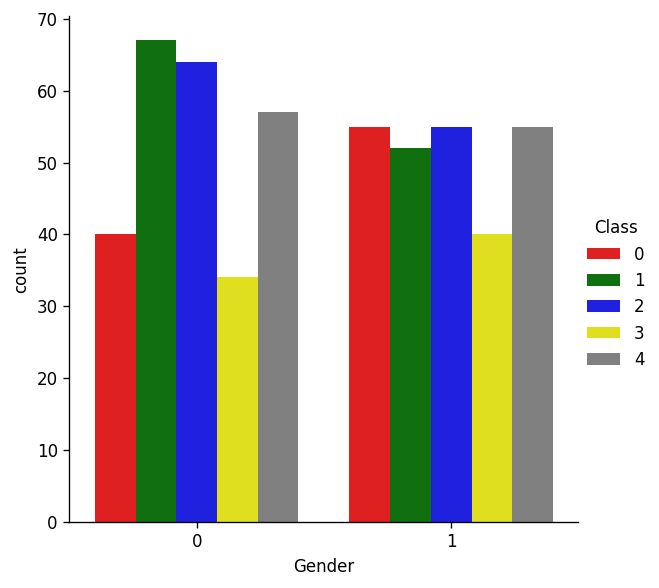

In [ ]:
sns.catplot(data=customer_RFM,x='Gender',hue='Class',palette=palette,kind='count')

In [ ]:
#ADD A COLUMN NAMED AGE RANGE
age=customer_RFM['Age']
conditions=[
    age<=20,
    (age>20) & (age<=30),
    (age>30) & (age<=50),
    age>50
]
values=['<20','20-30','30-50','>50']
customer_RFM['Age Range']=np.select(conditions,values)


In [ ]:
customer_RFM.head(5)

,ID,Country,Gender,Newsletter,Age,Tenure,Recency,Frequency,Monetary,Class,Age Range
0,1,GER - Germany,1,1,14,2873.0,1052.0,14,34948,1,<20
1,2,FR - France,0,1,33,2872.0,1056.0,7,17879,4,30-50
2,3,UK - United Kingdom,1,0,49,2872.0,1047.0,6,14603,4,30-50
3,4,IT - Italy,1,0,42,2872.0,1045.0,14,37029,1,30-50
4,5,GER - Germany,0,1,44,2871.0,1045.0,18,36913,1,30-50


<Axes: xlabel='Age Range', ylabel='Count'>

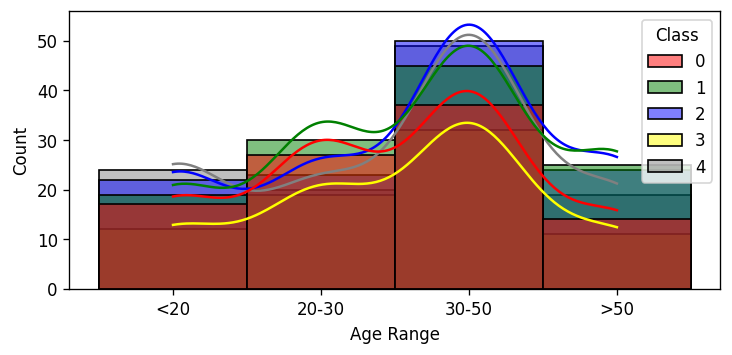

In [ ]:
plt.rcParams.update({'figure.figsize':(7,3),'figure.dpi':120})
customer_RFM.sort_values('Age',inplace=True)
sns.histplot(data=customer_RFM,hue='Class',palette=palette,x='Age Range',kde=True)

<Axes: xlabel='Country', ylabel='Count'>

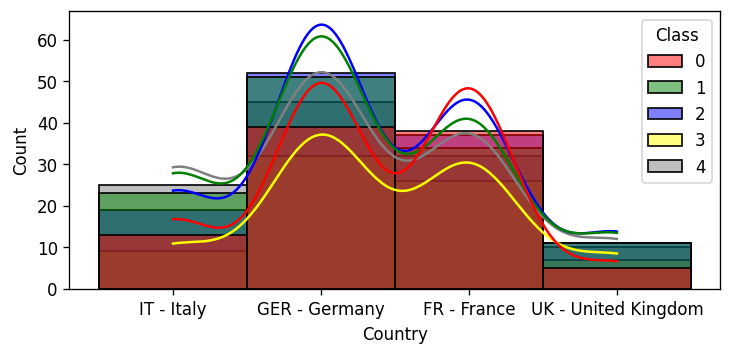

In [ ]:
sns.histplot(data=customer_RFM,hue='Class',palette=palette,kde=True,x='Country')

In [ ]:
import os
path='/content/drive/MyDrive/Traffic-20231031T043123Z-001/Traffic'
list_dir=os.listdir(path)

#WEB TRAFFIC

In [ ]:
list_dir

['2020_11.xlsx',
 '2020_06.xlsx',
 '2020_03.xlsx',
 '2020_04.xlsx',
 '2020_02.xlsx',
 '2020_01.xlsx',
 '2020_07.xlsx',
 '2020_08.xlsx',
 '2020_10.xlsx',
 '2020_05.xlsx',
 '2020_09.xlsx',
 '2020_12.xlsx']

In [ ]:
list_path=[]
for i in list_dir:
  path='/content/drive/MyDrive/Traffic-20231031T043123Z-001/Traffic/'+i
  list_path.append(path)
df=(pd.read_excel(j) for j in list_path)
df_traffic=pd.concat(df,ignore_index=True)


In [ ]:
df_traffic

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/11/032slease0.110547324875508,820.0,834.4,885.2,adgk-a@1D!Aw8\Z`,2020-11-09 10:58:52
1,/2020/11/100r-info0.785457657814133,1112.4,1133.6,1214.4,Po?o(_x007f_BPQ8qeQ>)5,2020-11-30 23:03:46
2,/2020/11/101Please0.84856840042231,4303.4,4404.0,4848.4,NiPea$n|Eu@<@>'L,2020-11-17 03:30:29
3,/2020/11/101H-info0.952751257680995,1105.8,1123.4,1214.8,NiPea$n|Eu@<@>'L,2020-11-17 15:17:03
4,/2020/11/195Nacing0.790692150708995,898.0,919.2,996.8,"PoAqnL=>P9Qb""ZUa",2020-11-02 08:23:19
...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
17885,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
17886,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
17887,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


In [ ]:
df_traffic['Page URL']=df_traffic['Page URL'].str.split('/',3,expand=True)[3].values

<ipython-input-57-c77db83c6720>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_traffic['Page URL']=df_traffic['Page URL'].str.split('/',3,expand=True)[3].values


In [ ]:
df_traffic

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,032slease0.110547324875508,820.0,834.4,885.2,adgk-a@1D!Aw8\Z`,2020-11-09 10:58:52
1,100r-info0.785457657814133,1112.4,1133.6,1214.4,Po?o(_x007f_BPQ8qeQ>)5,2020-11-30 23:03:46
2,101Please0.84856840042231,4303.4,4404.0,4848.4,NiPea$n|Eu@<@>'L,2020-11-17 03:30:29
3,101H-info0.952751257680995,1105.8,1123.4,1214.8,NiPea$n|Eu@<@>'L,2020-11-17 15:17:03
4,195Nacing0.790692150708995,898.0,919.2,996.8,"PoAqnL=>P9Qb""ZUa",2020-11-02 08:23:19
...,...,...,...,...,...,...
17884,yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
17885,yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
17886,you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
17887,youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


###JOIN 3 TABLES transaction, customer_info and item TO COMPUTE total_orders, total_customers, total_items, total_revenue by date and channel


In [ ]:
result = transaction.merge(customer_info,left_on = 'CustomerID', right_on = 'ID',how='inner').merge(item,left_on ='ItemID',right_on ='ItemID',how='inner')
transaction_summary = result.groupby(['TransactionDate','Channel']).agg(total_orders=('OrderID','nunique'),total_customers = ('CustomerID','nunique'),total_items = ('ItemID','nunique'),total_revenue=('SellPrice','sum'))


In [ ]:
transaction_summary

total_orders  total_customers  total_items  \
TransactionDate Channel                                                
2020-01-01      In Store            30               29           29   
                Online              35               35           36   
2020-01-02      In Store            33               32           33   
                Online              40               40           40   
2020-01-03      In Store            46               44           46   
...                                ...              ...          ...   
2020-12-25      Online              43               41           42   
2020-12-26      In Store            28               28           28   
                Online              39               39           41   
2020-12-27      In Store            45               43           45   
                Online              42               41           42   

                          total_revenue  
TransactionDate Channel                  
2020-01-01      In Store          23820  
                Online            32044  
2020-01-02      In Store          24069  
                Online            31612  
2020-01-03      In Store          37118  
...                                 ...  
2020-12-25      Online            31365  
2020-12-26      In Store          23072  
                Online            33473  
2020-12-27      In Store          37629  
                Online            34419  

[648 rows x 4 columns]

In [ ]:
transaction_summary.reset_index(inplace=True)

In [ ]:
transaction_summary

,TransactionDate,Channel,total_orders,total_customers,total_items,total_revenue
0,2020-01-01,In Store,30,29,29,23820
1,2020-01-01,Online,35,35,36,32044
2,2020-01-02,In Store,33,32,33,24069
3,2020-01-02,Online,40,40,40,31612
4,2020-01-03,In Store,46,44,46,37118
...,...,...,...,...,...,...
643,2020-12-25,Online,43,41,42,31365
644,2020-12-26,In Store,28,28,28,23072
645,2020-12-26,Online,39,39,41,33473
646,2020-12-27,In Store,45,43,45,37629


###CREATE PLOTS TO ILLUSTRATE THE DIFFERENCE BETWEEN 2 CHANNELS  IN total_orders, total_customers, total_items, total_revenue

In [ ]:
transaction_summary

,TransactionDate,Channel,total_orders,total_customers,total_items,total_revenue
0,2020-01-01,In Store,30,29,29,23820
1,2020-01-01,Online,35,35,36,32044
2,2020-01-02,In Store,33,32,33,24069
3,2020-01-02,Online,40,40,40,31612
4,2020-01-03,In Store,46,44,46,37118
...,...,...,...,...,...,...
643,2020-12-25,Online,43,41,42,31365
644,2020-12-26,In Store,28,28,28,23072
645,2020-12-26,Online,39,39,41,33473
646,2020-12-27,In Store,45,43,45,37629


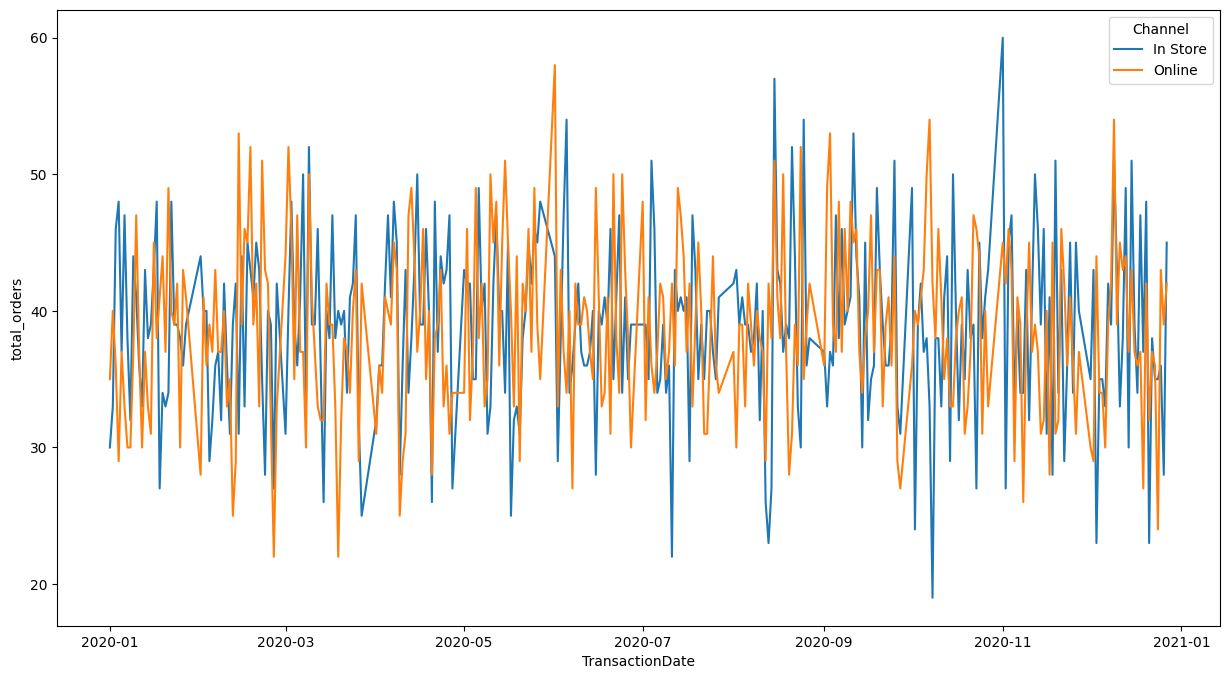

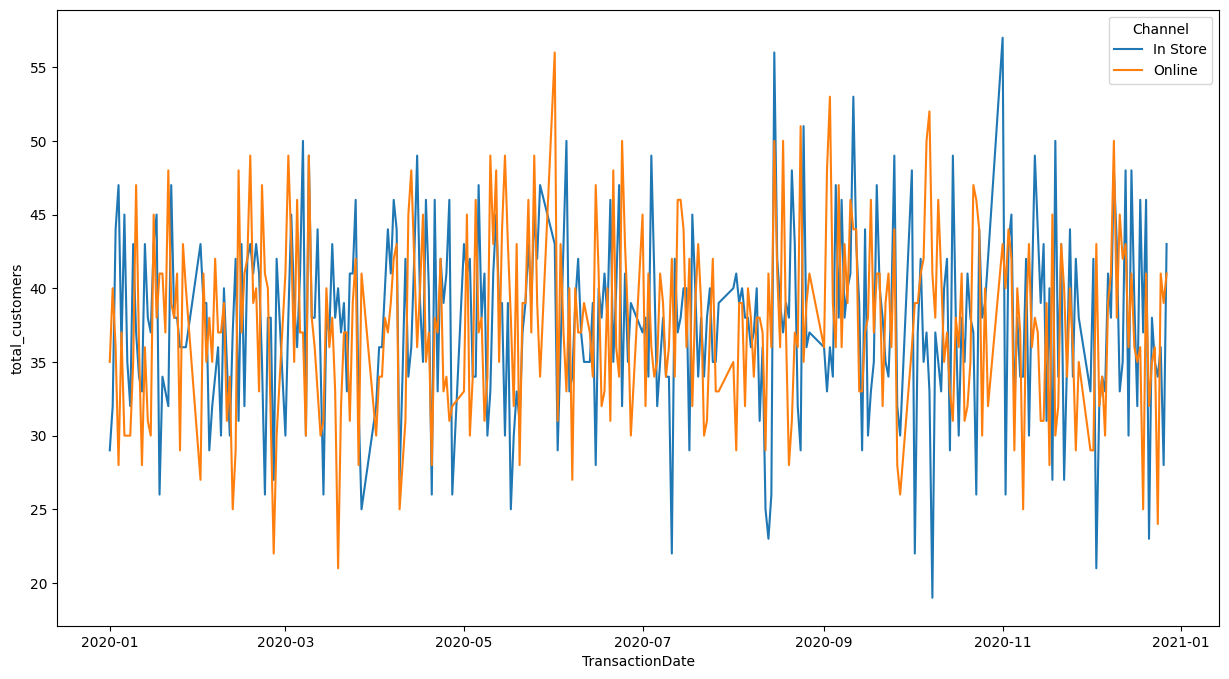

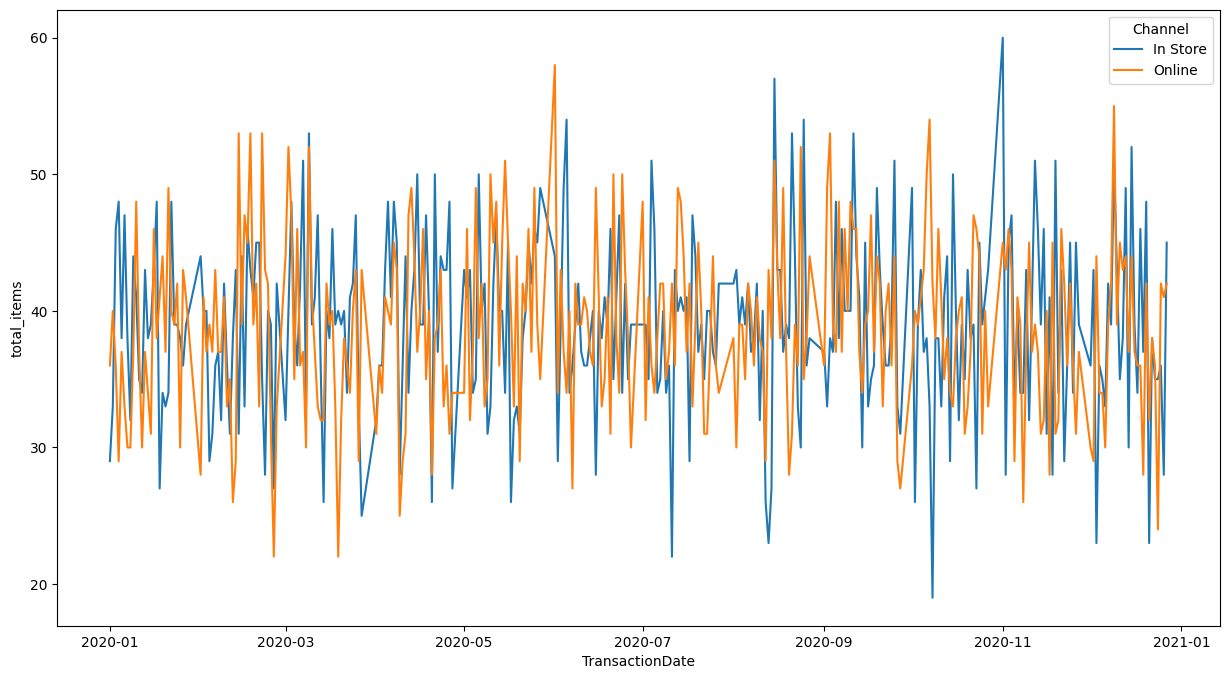

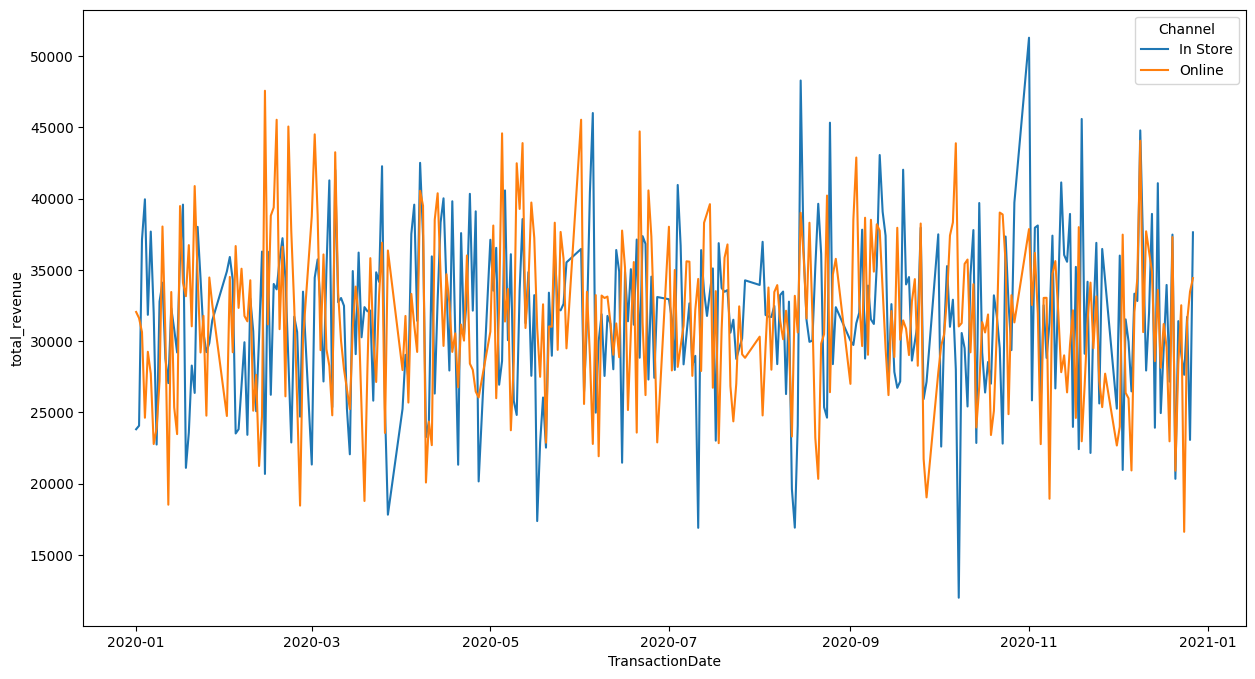

In [ ]:
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':100})
for i in [col for col in['total_orders','total_customers','total_items','total_revenue']]:
  sns.lineplot(data=transaction_summary,x='TransactionDate',y=i,hue='Channel')
  plt.show()

####=>>THERE ARE INSIGNIFICANT DIFFERENCES BETWEEN 2 CHANNELS






In [ ]:
revenue=transaction_summary.groupby('TransactionDate').agg(total_revenue=('total_revenue','sum'))

In [ ]:
revenue.reset_index(inplace=True)

In [ ]:
revenue.head(5)

,TransactionDate,total_revenue
0,2020-01-01,55864
1,2020-01-02,55681
2,2020-01-03,67753
3,2020-01-04,64573
4,2020-01-05,61098


In [ ]:
import datetime as dt
df_traffic['date']=df_traffic['Posted On (DD/MM/YYYY)'].dt.date

In [ ]:
traffic_summary=df_traffic.groupby('date').agg(total_users=('users','sum'),total_uniquePageviews=('uniquePageviews','sum'),total_pageviews=('pageviews','sum'))

In [ ]:
traffic_summary.reset_index(inplace=True)

In [ ]:
traffic_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   343 non-null    object 
 1   total_users            343 non-null    float64
 2   total_uniquePageviews  343 non-null    float64
 3   total_pageviews        343 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.8+ KB


In [ ]:
traffic_summary['date']=pd.to_datetime(traffic_summary['date'])

In [ ]:
traffic_revenue=traffic_summary.merge(revenue,left_on='date',right_on='TransactionDate').drop('TransactionDate',axis=1)

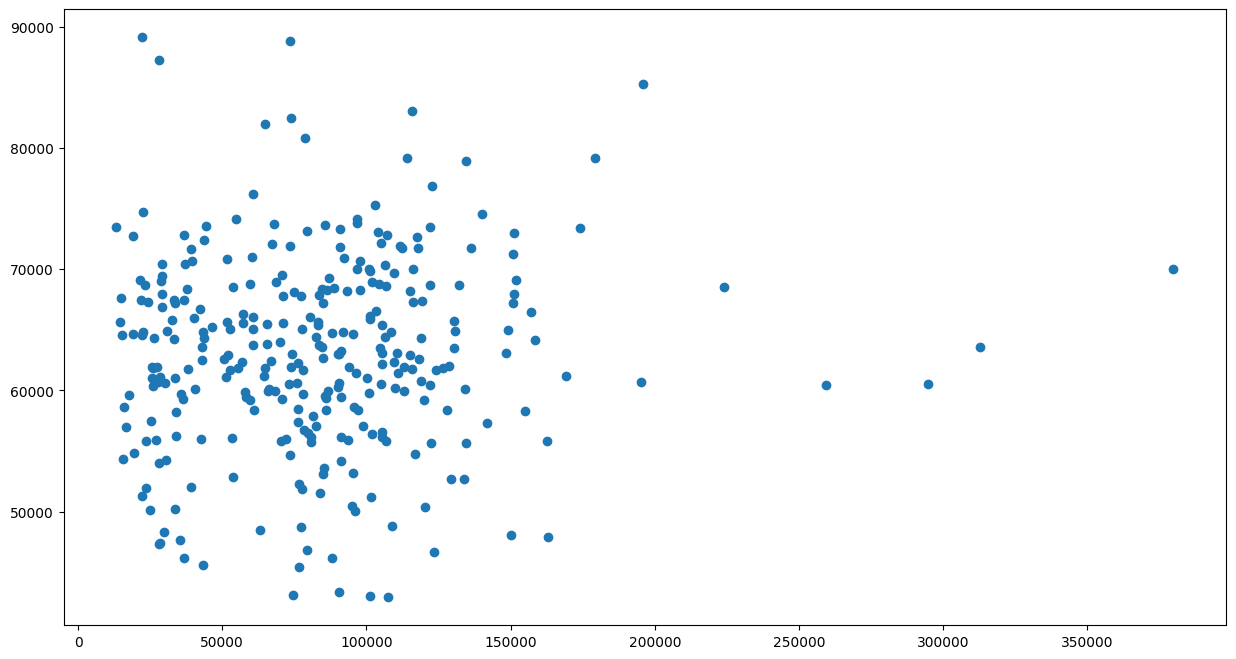

In [ ]:
plt.scatter(data=traffic_revenue,x='total_pageviews',y='total_revenue')

#### ==> WEB TRAFFIC DOESN'T EFFECT ON THE REVENUE

In [ ]:
traffic_revenue

,date,total_users,total_uniquePageviews,total_pageviews,total_revenue
0,2020-01-01,63755.4,64814.8,70353.6,55864
1,2020-01-02,111861.4,113640.0,122557.8,55681
2,2020-01-03,63749.8,65175.4,71058.0,67753
3,2020-01-04,13946.0,14274.6,15349.6,64573
4,2020-01-05,47065.0,47856.6,51438.2,61098
...,...,...,...,...,...
300,2020-12-05,23906.0,24678.8,27024.6,55953
301,2020-12-06,25892.8,26517.0,28433.4,47406
302,2020-12-07,95081.8,97565.0,105456.0,65365
303,2020-12-08,100577.0,105419.6,150902.2,67222


In [ ]:
df_traffic.rename(columns={'Page URL':'Product'},inplace=True)

In [ ]:
df_traffic

,Product,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),date
0,032slease0.110547324875508,820.0,834.4,885.2,adgk-a@1D!Aw8\Z`,2020-11-09 10:58:52,2020-11-09
1,100r-info0.785457657814133,1112.4,1133.6,1214.4,Po?o(_x007f_BPQ8qeQ>)5,2020-11-30 23:03:46,2020-11-30
2,101Please0.84856840042231,4303.4,4404.0,4848.4,NiPea$n|Eu@<@>'L,2020-11-17 03:30:29,2020-11-17
3,101H-info0.952751257680995,1105.8,1123.4,1214.8,NiPea$n|Eu@<@>'L,2020-11-17 15:17:03,2020-11-17
4,195Nacing0.790692150708995,898.0,919.2,996.8,"PoAqnL=>P9Qb""ZUa",2020-11-02 08:23:19,2020-11-02
...,...,...,...,...,...,...,...
17884,yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35,2020-12-01
17885,yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00,2020-12-03
17886,you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54,2020-12-06
17887,youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22,2020-12-04


In [ ]:
df_traffic.merge(item[['Product','SellPrice']],how='inner',on='Product').sort_values(['pageviews','SellPrice'],ascending=False)

,Product,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),date,SellPrice
2710,sonEies-x0.139039192479287,215222.6,221108.4,232177.0,So)zm5Pl^_G5_x007f_t?q,2020-06-16 13:44:20,2020-06-16,780
9128,porQlease0.507911745358356,155640.0,156789.4,170599.0,"Ac8IJsKH,4xtY.Tk",2020-01-23 04:45:44,2020-01-23,1357
962,pumMvideo0.837931992780922,47779.6,55759.2,128891.8,PU]vXmX9fgf$xf!/,2020-11-18 09:21:46,2020-11-18,1320
9783,besfeek-50.280274313298435,53508.2,61120.4,126771.0,BajeQM&IzKX.a8&_,2020-07-28 10:17:27,2020-07-28,1374
7579,rogLrecap0.644396392507623,52381.2,59658.8,124284.2,LaX{ty9j_zZdD-\`,2020-02-21 08:55:17,2020-02-21,1197
...,...,...,...,...,...,...,...,...
2767,sylEemand0.214265914271909,0.4,0.4,0.4,"RoQ+;,f@QlJHzNR&",2020-06-01 00:39:03,2020-06-01,1116
6284,tisetream0.262717438134904,0.4,0.4,0.4,Tir72~+xaqy!(G\-,2020-04-29 04:58:04,2020-04-29,901
11480,bobK-news0.573637665518942,0.2,0.2,0.4,"Ac8IJsKH,4xtY.Tk",2020-08-07 08:16:16,2020-08-07,870
6032,recPeator0.470956776867346,0.2,0.2,0.4,OlDe}#G)yIt'+Bc3,2020-04-30 11:20:13,2020-04-30,835
